In [ ]:
print("Advanced Computer Vision and Video Analytics_Lab2_Harish Sivakumar_E22CSEU0033")

Advanced Computer Vision and Video Analytics_Lab2_Harish Sivakumar_E22CSEU0033


1.1 Image Resizing: Resizing involves changing the dimensions of an image, either by scaling it up or down.

Image resizing (interpolation methods)

1.1.1	Linear

1.1.2	Nearest Neighbors

1.1.3	Polynomial


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Load your image
image_path = "/content/Picture1.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image, channels=3)  # Decodes into an RGB image

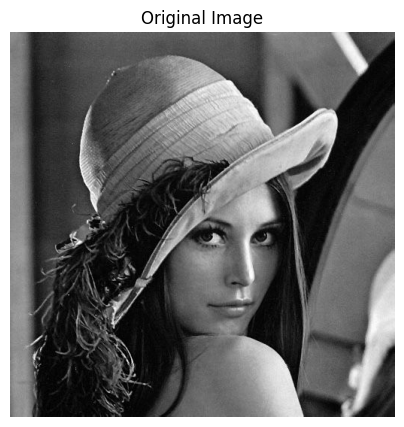

In [ ]:
# Display the original image
plt.figure(figsize=(5, 5))
plt.title("Original Image")
plt.imshow(image.numpy() / 255.0)  # Normalize for display
plt.axis('off')
plt.show()

In [ ]:
target_size = (200, 200)  # Target dimensions (height, width)
linear_resized = tf.image.resize(image, target_size, method='bilinear')
nearest_resized = tf.image.resize(image, target_size, method='nearest')
bicubic_resized = tf.image.resize(image, target_size, method='bicubic')

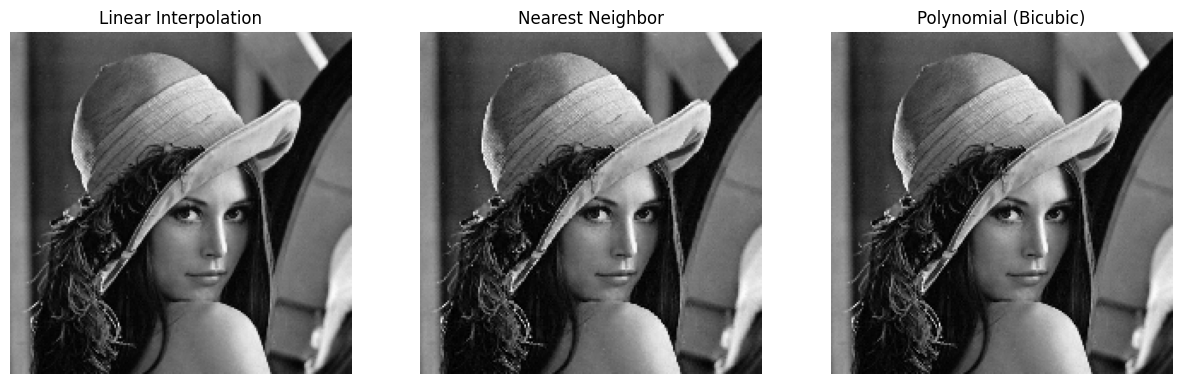

In [ ]:
# Display resized images
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Linear Interpolation")
plt.imshow(linear_resized.numpy() / 255.0)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Nearest Neighbor")
plt.imshow(nearest_resized.numpy() / 255.0)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Polynomial (Bicubic)")
plt.imshow(bicubic_resized.numpy() / 255.0)
plt.axis('off')

plt.show()

1.2 Image Blurring: Blurring is used to reduce image detail, suppress noise, or create artistic effects. Common techniques include:

1.2	Image blurring

1.2.1	Box blurring

1.2.2	Gaussian blurring

1.2.3	Adaptive blurring



In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# Apply Box Blur
box_blurred = cv2.blur(image, (10, 10))  # Kernel size (10, 10)

# Apply Gaussian Blur
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)  # Kernel size (5, 5), sigma=0

# Apply Adaptive (Bilateral) Blur
adaptive_blurred = cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

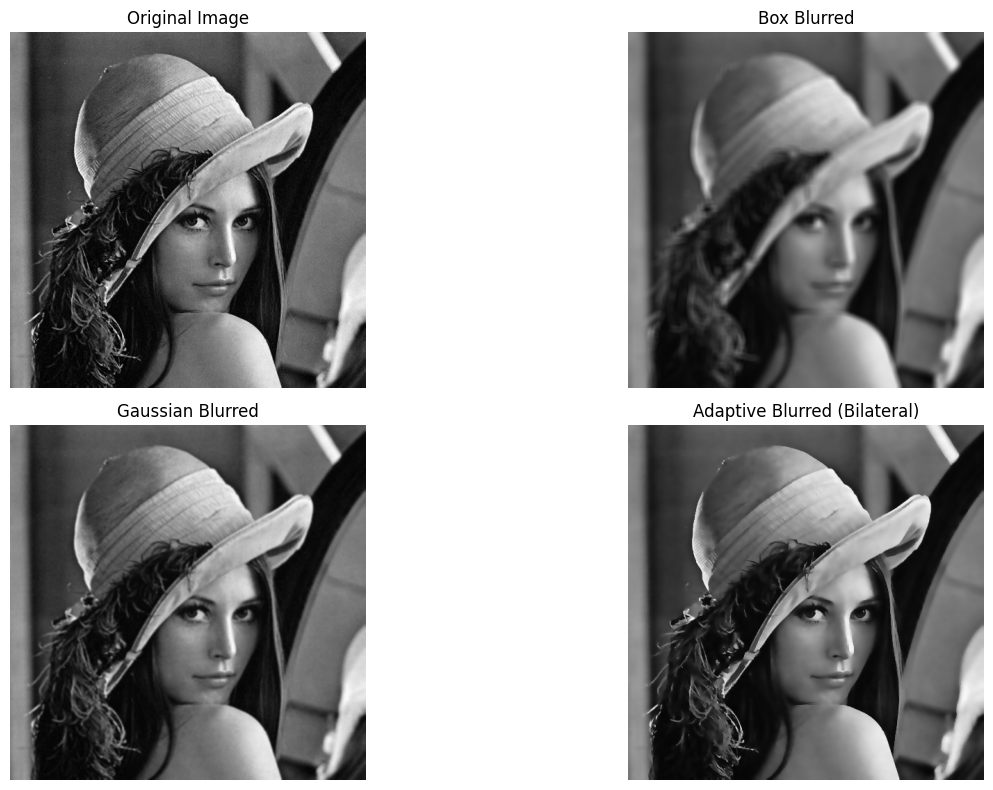

In [ ]:
# Create subplots to display the results
plt.figure(figsize=(15, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

# Box Blurred Image
plt.subplot(2, 2, 2)
plt.title("Box Blurred")
plt.imshow(box_blurred)
plt.axis("off")

# Gaussian Blurred Image
plt.subplot(2, 2, 3)
plt.title("Gaussian Blurred")
plt.imshow(gaussian_blurred)
plt.axis("off")

# Adaptive Blurred Image
plt.subplot(2, 2, 4)
plt.title("Adaptive Blurred (Bilateral)")
plt.imshow(adaptive_blurred)
plt.axis("off")

# Show the plot
plt.tight_layout()
plt.show()

Task-2: - Apply Machine Learning Algorithm and find the model accuracy

based on K fold Cross Validation with (80-20 train-test split).

2.1	Use MNIST dataset

2.2	Use any two of the following algorithms-

2.2.1	Naive Bayesian or its variant.

2.2.2	Support Vector Machine (SVM) or its variant

2.2.3	Decision Trees/ Random Forest.

2.2.4	AdaBoost or other ensemble algorithms.

2.2.5	Artificial Neural Networks (NN) or its variant.

2.3	Results should be obtained on following parameters-

2.3.1	Accuracy

2.3.2	Precision (Positive Predictive Value)

2.3.3	Recall (Sensitivity)

2.3.4	F-Measure

2.3.5	Confusion Matrix

2.3.6	ROC

2.3.7	AUC



# Artificial Neural Network(ANN)

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(x, y), (x_test, y_test) = mnist.load_data()

In [ ]:
x = x / 255.0  # Normalize training data
x_test = x_test / 255.0
y_onehot = to_categorical(y, num_classes=10)  # One-hot encode labels
y_test_onehot = to_categorical(y_test, num_classes=10)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-Fold Cross Validation

In [ ]:
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []
conf_matrix_sum = np.zeros((10, 10))

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8372 - loss: 0.5553 - val_accuracy: 0.9562 - val_loss: 0.1483
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9528 - loss: 0.1521 - val_accuracy: 0.9654 - val_loss: 0.1098
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1104 - val_accuracy: 0.9692 - val_loss: 0.1025
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9712 - loss: 0.0909 - val_accuracy: 0.9743 - val_loss: 0.0868
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9726 - loss: 0.0840 - val_accuracy: 0.9755 - val_loss: 0.0862


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_17 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix for Fold 6:
[[1161    0    1    1    2    2    6    0    1    1]
 [   0 1313    4    0    2    0    0    1    1    1]
 [   1    6 1146    3    2    1    2    7    5    1]
 [   1    1   14 1179    0    9    0    4    9    2]
 [   1    3    0    1 1147    1    6    2    3   12]
 [   8    3    1   20    2 1053    5    3    7    2]
 [   0    1    0    0    0    2 1171    0    3    0]
 [   1    6    8    3    3    2    0 1273    1    2]
 [   3    2    5    8    6   13    6    1 1114    2]
 [   5    0    0    7   11    5    1   12    4 1149]]


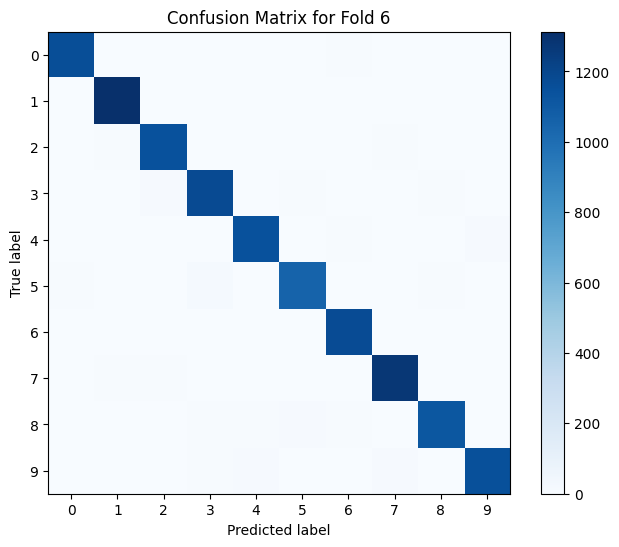

Fold 6 - Accuracy: 0.9755, AUC: 0.9994


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8446 - loss: 0.5395 - val_accuracy: 0.9542 - val_loss: 0.1469
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.1487 - val_accuracy: 0.9639 - val_loss: 0.1158
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9648 - loss: 0.1130 - val_accuracy: 0.9693 - val_loss: 0.1023
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0920 - val_accuracy: 0.9707 - val_loss: 0.0951
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9747 - loss: 0.0809 - val_accuracy: 0.9697 - val_loss: 0.0995


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix for Fold 7:
[[1173    0    1    1    2    5    5    1    0    1]
 [   0 1335    5    0    3    2    3    2    0    0]
 [   7    5 1111    6    2    1    4    8    2    2]
 [   3    3   14 1193    0   20    1   13   14    4]
 [   1    1    2    0 1141    0    2    4    1    6]
 [   6    1    0    2    0 1075   18    0    4    5]
 [   5    0    3    0    5    0 1225    0    1    0]
 [   1    4   11    0    6    3    0 1185    0    7]
 [   2   10    5    6    7   14   15    2 1072   12]
 [   4    4    2    6   16    4    1   11    4 1126]]


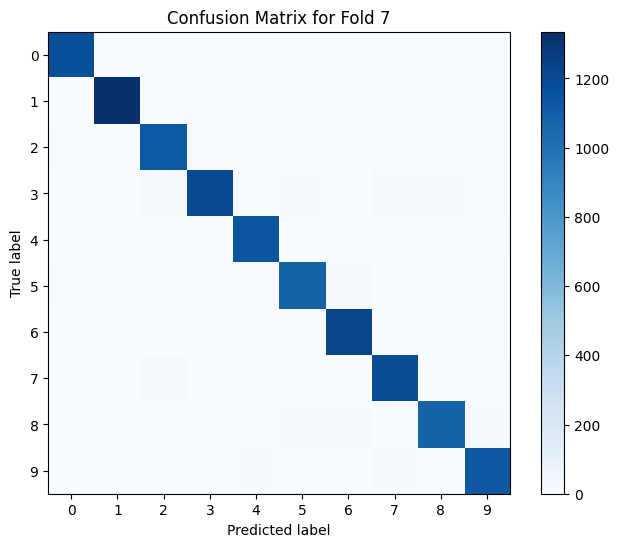

Fold 7 - Accuracy: 0.9697, AUC: 0.9992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8419 - loss: 0.5383 - val_accuracy: 0.9514 - val_loss: 0.1597
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9521 - loss: 0.1555 - val_accuracy: 0.9611 - val_loss: 0.1224
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9627 - loss: 0.1187 - val_accuracy: 0.9663 - val_loss: 0.1128
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0879 - val_accuracy: 0.9699 - val_loss: 0.1017
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9738 - loss: 0.0817 - val_accuracy: 0.9715 - val_loss: 0.0941


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Confusion Matrix for Fold 8:
[[1175    0    1    1    1    0    9    0    2    3]
 [   0 1318    6    1    0    1    1    0    1    0]
 [   6    5 1177    8    8    1    5    5    7    1]
 [   2    2    8 1136    0   22    0    3    8    8]
 [   0    4    0    0 1103    0    4    3    3   32]
 [   3    1    4    6    1 1062    9    2    2    6]
 [   1    1    1    0    6    8 1169    0    2    0]
 [   2    4    6    9    7    1    1 1214    1   20]
 [   2    6    1    8    1    5    6    1 1143    8]
 [   1    2    0    2    9    2    1    8    3 1161]]


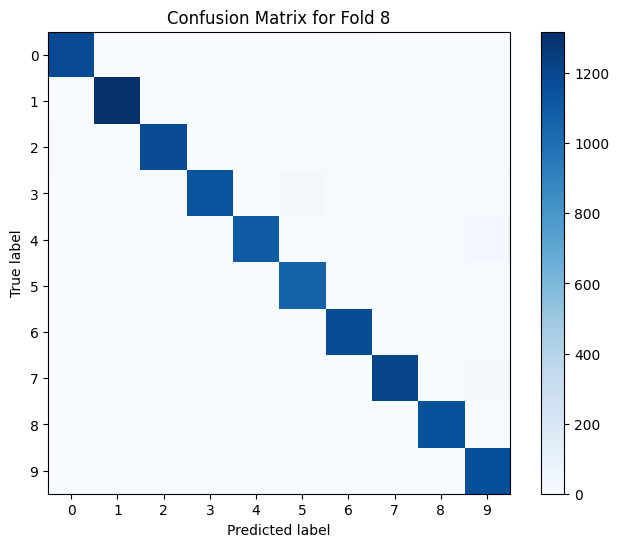

Fold 8 - Accuracy: 0.9715, AUC: 0.9992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8434 - loss: 0.5349 - val_accuracy: 0.9565 - val_loss: 0.1505
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9522 - loss: 0.1546 - val_accuracy: 0.9657 - val_loss: 0.1150
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9649 - loss: 0.1152 - val_accuracy: 0.9653 - val_loss: 0.1123
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9699 - loss: 0.0901 - val_accuracy: 0.9691 - val_loss: 0.1048
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9740 - loss: 0.0800 - val_accuracy: 0.9717 - val_loss: 0.0982


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_20 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_38               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_39               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_40               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix for Fold 9:
[[1184    0    0    2    0    0    1    2    4    2]
 [   1 1337    5    1    2    0    1    4    4    0]
 [   8    5 1159    8    2    1    2    3    9    0]
 [   1    4    5 1261    0   14    1    1    4    2]
 [   1    3    6    1 1177    0    5    4    5   18]
 [   2    0    4   14    4  992    8    2   12    6]
 [   6    3    0    0    5    4 1087    0    1    1]
 [   1    4    6    3    4    0    0 1197    6    5]
 [   5    1    4   10    0    6    7    1 1126    1]
 [   6    0    3    3   22    9    0    6   13 1140]]


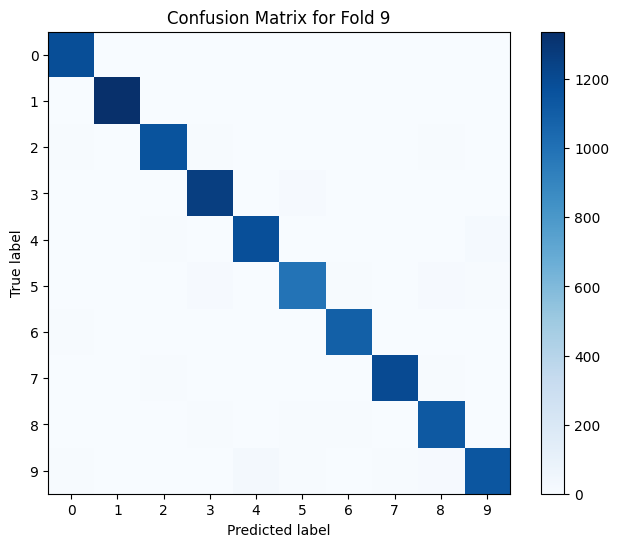

Fold 9 - Accuracy: 0.9717, AUC: 0.9992


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8400 - loss: 0.5502 - val_accuracy: 0.9528 - val_loss: 0.1529
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9519 - loss: 0.1567 - val_accuracy: 0.9623 - val_loss: 0.1198
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9634 - loss: 0.1185 - val_accuracy: 0.9637 - val_loss: 0.1162
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9718 - loss: 0.0918 - val_accuracy: 0.9674 - val_loss: 0.1053
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9730 - loss: 0.0827 - val_accuracy: 0.9720 - val_loss: 0.0924


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 335,232 (1.28 MB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 223,190 (871.84 KB)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix for Fold 10:
[[1146    0    2    2    3    4   11    0    3    1]
 [   0 1363    2    1    9    1    3    3    3    2]
 [   2    3 1183    7    3    2    3    5    8    0]
 [   0    2    8 1122    0   14    2    7    9    1]
 [   0    1    0    1 1117    1    4    4    1   10]
 [   0    1    0    8    2 1043    3    0    5    4]
 [   3    0    0    0    2   15 1183    0    4    0]
 [   1    4    6    2    4    0    0 1225    2   14]
 [   2    7    1   14    4   14    3    3 1149    7]
 [   1    1    0   10   20    7    0   10    4 1133]]


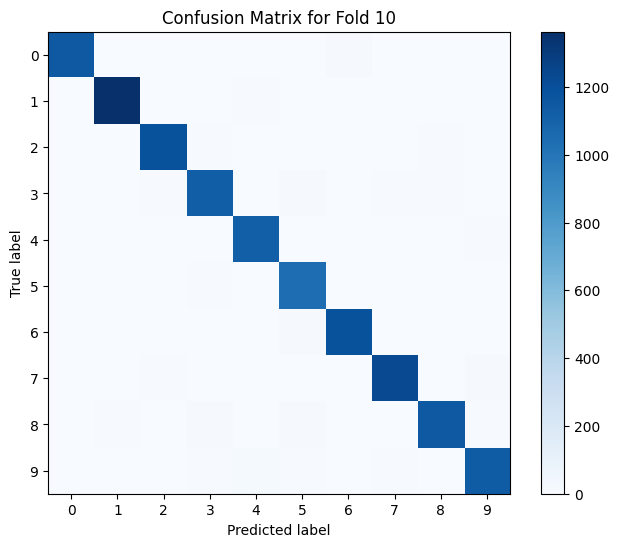

Fold 10 - Accuracy: 0.9720, AUC: 0.9994


In [ ]:
for train_index, val_index in kf.split(x):
    # Split data into train and validation for the current fold
    x_train, x_val = x[train_index], x[val_index]
    y_train, y_val = y_onehot[train_index], y_onehot[val_index]

    # Build the model
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=32, verbose=1)
    model.summary()

    # Evaluate on validation set
    y_val_pred_proba = model.predict(x_val)  # Predicted probabilities
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)  # Predicted class labels
    y_val_true = np.argmax(y_val, axis=1)  # True class labels

    # Calculate metrics for the current fold
    accuracy = accuracy_score(y_val_true, y_val_pred)
    precision = precision_score(y_val_true, y_val_pred, average='weighted')
    recall = recall_score(y_val_true, y_val_pred, average='weighted')
    f1 = f1_score(y_val_true, y_val_pred, average='weighted')
    conf_matrix = confusion_matrix(y_val_true, y_val_pred)

    # Update metrics storage
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    conf_matrix_sum += conf_matrix

    # Print and plot the Confusion Matrix for the current fold
    print(f"Confusion Matrix for Fold {fold}:")
    print(conf_matrix)

    # Plot Confusion Matrix for the current fold
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, np.arange(10))
    plt.yticks(tick_marks, np.arange(10))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # ROC Curve and AUC for the current fold
    fpr, tpr, _ = roc_curve(y_val.ravel(), y_val_pred_proba.ravel())
    roc_auc = auc(fpr, tpr)
    roc_auc_list.append(roc_auc)

    print(f"Fold {fold} - Accuracy: {accuracy:.4f}, AUC: {roc_auc:.4f}")
    fold += 1


In [ ]:
mean_accuracy = np.mean(accuracy_list)
mean_precision = np.mean(precision_list)
mean_recall = np.mean(recall_list)
mean_f1_score = np.mean(f1_list)
mean_roc_auc = np.mean(roc_auc_list)

print(f"\nMean Accuracy from K-Fold Cross Validation: {mean_accuracy * 100:.2f}%")
print(f"Mean Precision: {mean_precision:.2f}")
print(f"Mean Recall: {mean_recall:.2f}")
print(f"Mean F1-Score: {mean_f1_score:.2f}")
print(f"Mean ROC AUC: {mean_roc_auc:.2f}")


Mean Accuracy from K-Fold Cross Validation: 97.21%
Mean Precision: 0.97
Mean Recall: 0.97
Mean F1-Score: 0.97
Mean ROC AUC: 1.00


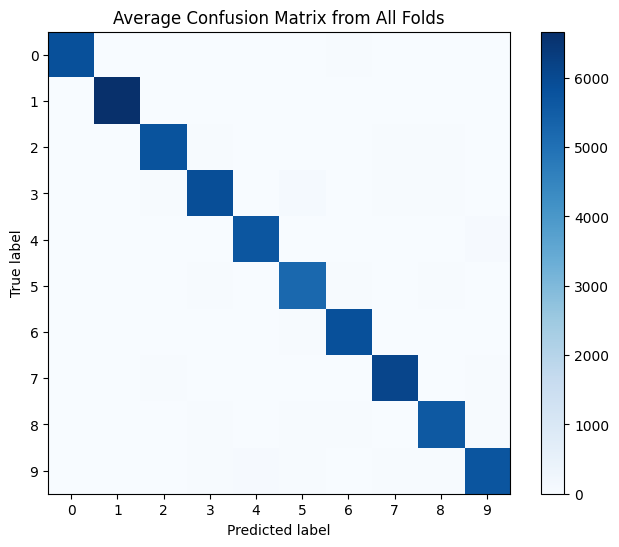

In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix_sum, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix from All Folds')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

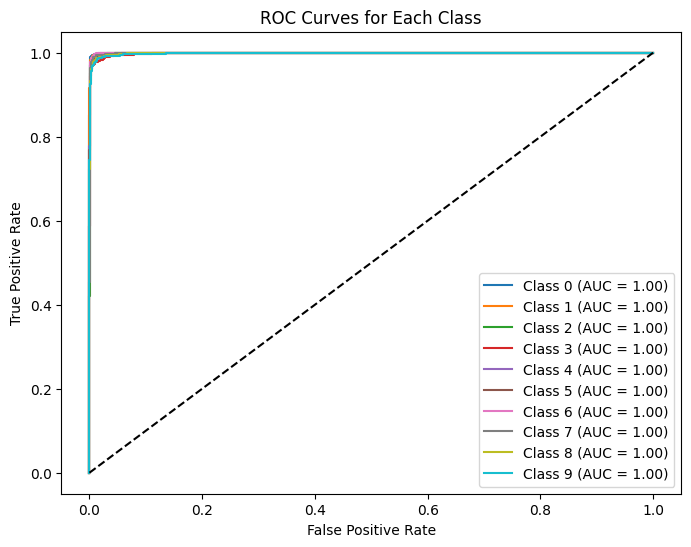

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

num_classes = 10  # MNIST has 10 classes
fpr_dict = {}  # To store false positive rates for each class
tpr_dict = {}  # To store true positive rates for each class
roc_auc_dict = {}  # To store AUC values for each class

# Compute ROC and AUC
for i in range(num_classes):
    fpr_dict[i], tpr_dict[i], _ = roc_curve(y_val[:, i], y_val_pred_proba[:, i])  # One-vs-all
    roc_auc_dict[i] = auc(fpr_dict[i], tpr_dict[i])

# Plot ROC
plt.figure(figsize=(8,6))
for i in range(num_classes):
    plt.plot(
        fpr_dict[i],
        tpr_dict[i],
        label=f'Class {i} (AUC = {roc_auc_dict[i]:.2f})'
    )

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes

In [189]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler, label_binarize
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [191]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [192]:
X_train_full = X_train_full.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [193]:
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [194]:
y_train_full = to_categorical(y_train_full, 10)
y_test = to_categorical(y_test, 10)

In [195]:
accuracies = []
precisions = []
recalls = []
f1_scores = []
cm_list = []
roc_auc_list = []

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1

In [196]:
for train_index, val_index in kf.split(X_train_full, np.argmax(y_train_full, axis=1)):
    X_train, X_val = X_train_full[train_index], X_train_full[val_index]
    y_train, y_val = y_train_full[train_index], y_train_full[val_index]

    # Create Naive Bayes model
    nb_model = MultinomialNB()

    # Train the model
    nb_model.fit(X_train, np.argmax(y_train, axis=1))

    # Predict on validation set
    y_val_pred = nb_model.predict(X_val)
    y_val_pred_proba = nb_model.predict_proba(X_val)

    # Calculate metrics
    accuracy = accuracy_score(np.argmax(y_val, axis=1), y_val_pred)
    precision = precision_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')
    recall = recall_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')
    f1 = f1_score(np.argmax(y_val, axis=1), y_val_pred, average='weighted')

    # Store results
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_val, axis=1), y_val_pred)
    cm_list.append(cm)

    # ROC Curve and AUC
    fpr_all = {}
    tpr_all = {}
    roc_auc_all = {}

    for i in range(10):  # 10 classes (0-9)
        fpr, tpr, _ = roc_curve(label_binarize(np.argmax(y_val, axis=1), classes=np.arange(10))[:, i], y_val_pred_proba[:, i])
        roc_auc = auc(fpr, tpr)
        fpr_all[i] = fpr
        tpr_all[i] = tpr
        roc_auc_all[i] = roc_auc

    fold += 1


In [197]:
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")

Average Accuracy: 0.8234
Average Precision: 0.8315
Average Recall: 0.8234
Average F1 Score: 0.8242


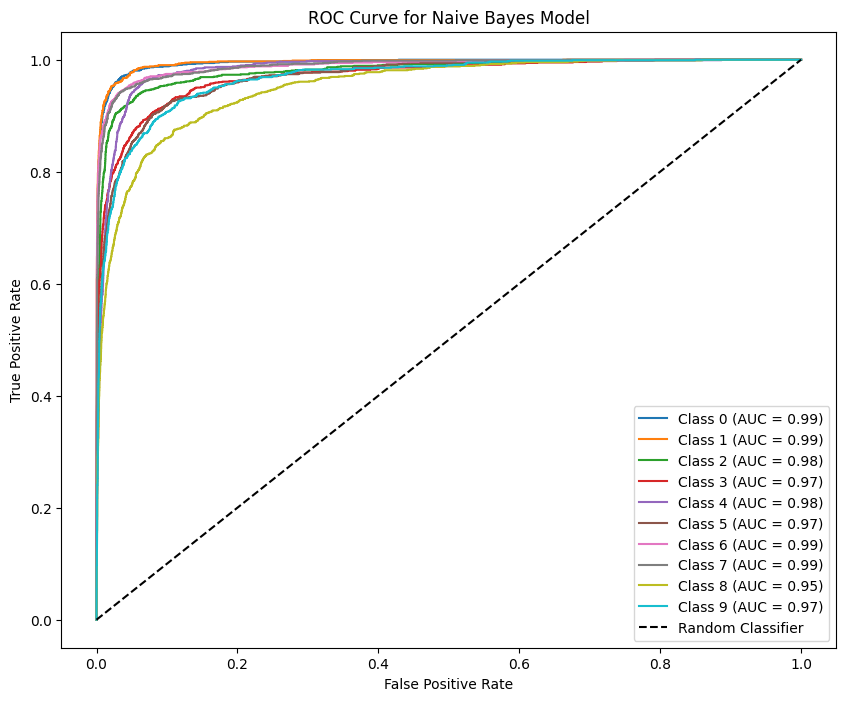

Confusion Matrix for Fold 1:
 [[1081    2    3    2    3   13   16    0   63    1]
 [   0 1278    8    6    1    4    7    0   42    2]
 [  17   15  969   30   14    1   59   11   74    1]
 [   8   29   52 1000    1   26   11   10   62   28]
 [   2    3    4    2  855    6   27    1   60  209]
 [  33   14   12  119   23  704   27    5  114   34]
 [  12   25   15    0    6   28 1087    0   10    0]
 [   6   19    6    5   33    0    0 1039   44  101]
 [   7   82   19   71   14   39   13    2  879   44]
 [   8    9    4   17   57    6    0   40   46 1003]]
Confusion Matrix for Fold 2:
 [[1075    1    6    4    4   24   15    0   54    2]
 [   0 1246   10   10    1   12    6    0   59    5]
 [  16   19 1005   23   16    1   51    5   51    4]
 [   4   24   59 1002    3   20   10    9   56   39]
 [   4    6    8    0  872    4   21    2   45  206]
 [  28   11   10  143   21  719   23    3   85   41]
 [  10   28   19    0    3   33 1082    0    9    0]
 [  16   20    7    5   31    0    0 1

In [198]:
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 8))

for i in range(10):
    plt.plot(fpr_all[i], tpr_all[i], label=f'Class {i} (AUC = {roc_auc_all[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend(loc="lower right")
plt.show()

# Display Confusion Matrices for each fold
for i, cm in enumerate(cm_list):
    print(f"Confusion Matrix for Fold {i+1}:\n", cm)